# Proyek Analisis Data: [products_dataset.cvs]
- **Nama:** [Elsa Septiana Rif'at]
- **Email:** [eseptiana674@gmail.com]
- **ID Dicoding:** [elsaseptiana]

## Menentukan Pertanyaan Bisnis

- Apa saja 10 produk yang paling banyak terjual?
- Berapa rata-rata jumlah foto setiap kategori?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd

orders_df = pd.read_csv("products_dataset.csv")
orders_df.head()



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- menampilkan 5 data orders

### Assessing Data

In [9]:
import pandas as pd

products_dataset = pd.read_csv("products_dataset.csv")

# Menampilkan ringkasan informasi dataset
print("Informasi Dataset:")
print("=" * 50)
products_dataset.info()

# Menampilkan jumlah duplikasi dalam dataset
duplicate_count = products_dataset.duplicated().sum()
print("\nTotal Data Duplikat:", duplicate_count)


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Total Data Duplikat: 0


**Insight:**
- menampilkan ringkasan dataset
- menampilkan total data duplikat

### Cleaning Data

In [10]:
# Mengecek jumlah data duplikat sebelum dihapus
jumlah_duplikat_sebelum = products_df.duplicated().sum()
print(f"Jumlah duplikasi sebelum dihapus: {jumlah_duplikat_sebelum}")

# Menghapus data duplikat dengan membuat salinan dataset yang sudah dibersihkan
products_df_cleaned = products_df.drop_duplicates()

# Mengecek jumlah data duplikat setelah dihapus
jumlah_duplikat_sesudah = products_df_cleaned.duplicated().sum()
print(f"Jumlah duplikasi setelah dihapus: {jumlah_duplikat_sesudah}")


Jumlah duplikasi sebelum dihapus: 0
Jumlah duplikasi setelah dihapus: 0


**Insight:**
- menampilkan duplikasi sebelum dihapus
- menampilkan duplikasi setelah dihapus

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
orders_products_df = pd.merge(
    left=orders_df,
    right=products_df,
    how="left",
    left_on="product_id",   # Sesuaikan nama kolom jika perlu
    right_on="product_id"
)


# Menampilkan 5 baris pertama hasil merge
orders_products_df.head()



,product_id,product_category_name_x,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
data_baru_df = pd.merge(
    left=orders_df,
    right=products_df,
        how="left",
    left_on="product_id",   # Sesuaikan nama kolom jika perlu
    right_on="product_id"
)

data_baru_df.head()

,product_id,product_category_name_x,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
# Simpan hasil gabungan dataset ke file CSV
data_baru_df.to_csv("data_baru.csv", index=False)


**Insight:**
- menampilkan 5 data
- menggabungkan 2 dataset

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [16]:
# Menghitung jumlah transaksi untuk setiap kategori produk
produk_terlaris = data_baru_df["product_category_name_x"].value_counts().reset_index()
produk_terlaris.columns = ["product_category_name_x", "total_sold"]

# Menampilkan 10 kategori produk terlaris
print(produk_terlaris.head(10))




  product_category_name_x  total_sold
0         cama_mesa_banho        3029
1           esporte_lazer        2867
2        moveis_decoracao        2657
3            beleza_saude        2444
4   utilidades_domesticas        2335
5              automotivo        1900
6  informatica_acessorios        1639
7              brinquedos        1411
8      relogios_presentes        1329
9               telefonia        1134


<ipython-input-17-c00e0cbb212a>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(top_products))


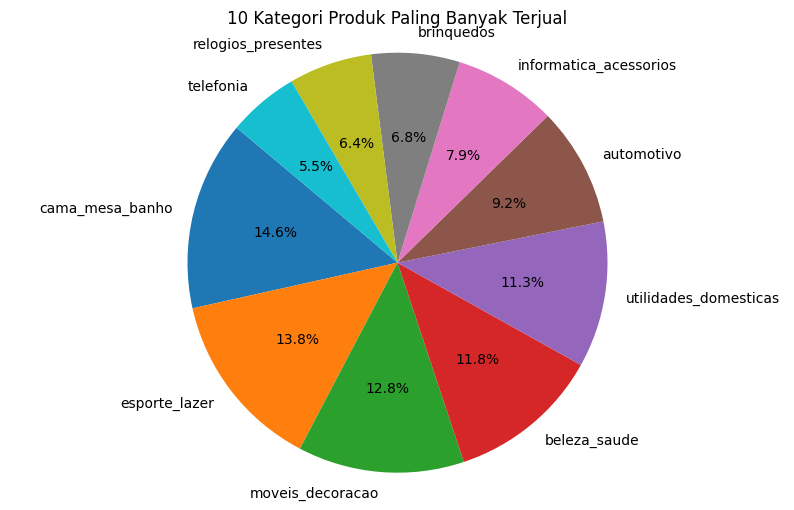

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil 10 produk terlaris
top_products = produk_terlaris.head(10)

# Buat warna unik untuk setiap kategori
colors = plt.cm.get_cmap("tab10", len(top_products))

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_products["total_sold"],
    labels=top_products["product_category_name_x"],
    autopct='%1.1f%%',
    colors=[colors(i) for i in range(len(top_products))],  # Warna unik
    startangle=140
)

plt.title("10 Kategori Produk Paling Banyak Terjual")
plt.axis("equal")  # Menjaga aspek agar lingkaran sempurna
plt.show()


### Pertanyaan 2:

In [18]:
import pandas as pd

# Membaca dataset
file_path = "data_baru.csv"  # Sesuaikan dengan lokasi file
data_baru_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset untuk memastikan data sudah terbaca
print(data_baru_df.head())


                         product_id product_category_name_x  \
0  1e9e8ef04dbcff4541ed26657ea517e5              perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                   artes   
2  96bd76ec8810374ed1b65e291975717f           esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                   bebes   
4  9dc1a7de274444849c219cff195d0b71   utilidades_domesticas   

   product_name_lenght_x  product_description_lenght_x  product_photos_qty_x  \
0                   40.0                         287.0                   1.0   
1                   44.0                         276.0                   1.0   
2                   46.0                         250.0                   1.0   
3                   27.0                         261.0                   1.0   
4                   37.0                         402.0                   4.0   

   product_weight_g_x  product_length_cm_x  product_height_cm_x  \
0               225.0                 16.0                 10.0   
1     

In [19]:
# Menghitung rata-rata jumlah foto untuk setiap kategori produk
foto_rata_rata = data_baru_df.groupby("product_category_name_x")["product_photos_qty_x"].mean().reset_index()

# Mengurutkan berdasarkan jumlah foto terbanyak dan mengambil 5 kategori teratas
foto_rata_rata = foto_rata_rata.sort_values(by="product_photos_qty_x", ascending=False).head(5)

# Menampilkan hasil
print(foto_rata_rata)

           product_category_name_x  product_photos_qty_x
34                fashion_calcados              5.121387
60                        pc_gamer              4.333333
16                 casa_construcao              3.266667
39  fashion_underwear_e_moda_praia              3.264151
37   fashion_roupa_infanto_juvenil              3.200000


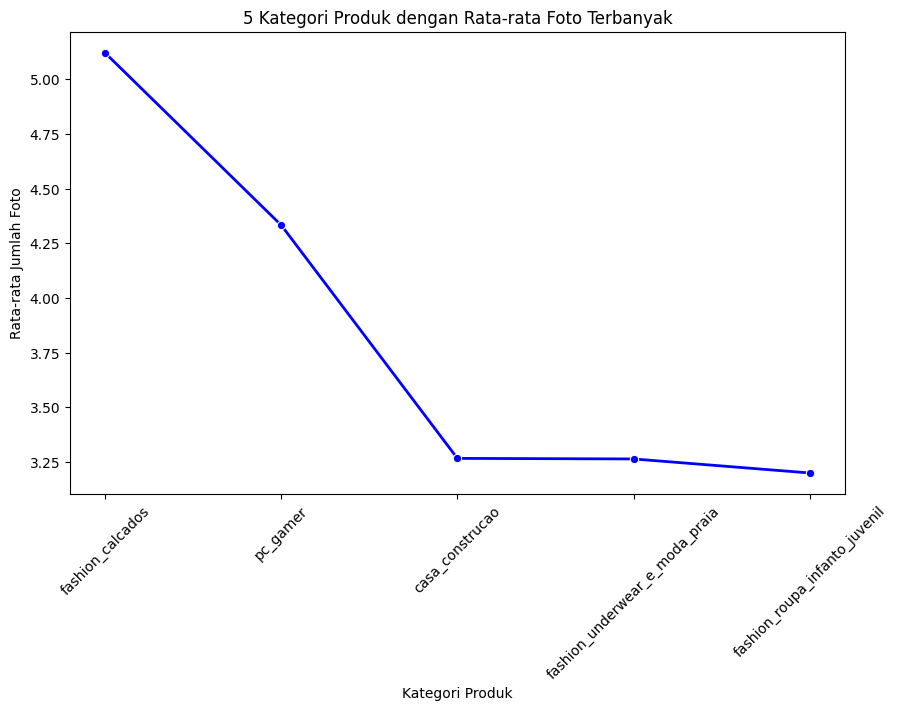

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat line plot
sns.lineplot(
    x="product_category_name_x",
    y="product_photos_qty_x",
    data=foto_rata_rata,
    marker="o",  # Menambahkan titik pada setiap data
    linewidth=2,  # Ketebalan garis
    color="b"  # Warna garis
)

# Memberikan label dan judul
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Jumlah Foto")
plt.title("5 Kategori Produk dengan Rata-rata Foto Terbanyak")

# Memutar label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


**Insight:**
- Menampilkan 10 produk dengan pnjualan terbanyak
- Menampilkan 5 katergori produk dengan rata-rata terbanyak

## Analisis Lanjutan (Opsional)

## Conclusion



1.   Produk "cama_mesa_banho" paling laris dengan 3.029 transaksi, karena kebutuhan rumah tangga yang terus ada. Sebaliknya, "telefonia" paling sedikit dengan 1.134 transaksi, kemungkinan karena siklus belinya lebih lama. Sarannya bisa dibantu promo atau bundling biar lebih menarik.
2. Kategori "fashion_calcados" punya rata-rata foto terbanyak, sekitar 5,12 foto per produk, disusul "pc_gamer" dengan 4,33 foto per produk. karena produk-produk tersebut butuh tampilan lebih detail buat menarik pembeli. Sementara itu, kategori "fashion_roupa_infanto_juvenil" cuma punya 3,2 foto per produk, bikin kurang menarik dibanding kategori lain.
Saran: Tambahin lebih banyak foto di kategori yang masih minim supaya calon pembeli bisa lihat produknya lebih jelas dan makin tertarik buat beli.
